## Introduction
In order to gain insight into the data for this project, we will here carry out data exploration. Once again, let us import the master data set which we created in section 1.0.

In [1]:
# import the python required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the master_dataset.xls
df_master = pd.read_excel('master_dataset.xlsx', sheetname='Sheet1')
print (df_master.head())

   Store                 Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-05-02 00:00:00        42.31       2.572    10382.9    6115.67   
1      1  2010-12-02 00:00:00        38.51       2.548    10382.9    6115.67   
2      1  2010-02-19 00:00:00        39.93       2.514    10382.9    6115.67   
3      1  2010-02-26 00:00:00        46.63       2.561    10382.9    6115.67   
4      1  2010-05-03 00:00:00        46.50       2.625    10382.9    6115.67   

   MarkDown3  MarkDown4  MarkDown5         CPI     ...          Books  \
0     215.07    2406.62    6551.42  211.096358     ...       73315.81   
1     215.07    2406.62    6551.42  211.242170     ...       77280.42   
2     215.07    2406.62    6551.42  211.289143     ...       78602.71   
3     215.07    2406.62    6551.42  211.319643     ...       76091.36   
4     215.07    2406.62    6551.42  211.350143     ...       71718.48   

  Musical_Instruments  Star_Wars  Movies_TV  Video_Games  Portable_Audios  \
0  

### Statistical Overview

The dataset has:

1. About 8190 sales record and 95 features
2. About 7% of the total period of sales are holidays
3. Mean promotional sales are as follows: Markdown1 = 8887.617797, Markdown2 = 6107.224317, Markdown3 = 928.785220, Markdown4 = 3130.176556, Markdown5 = 4544.031686 
4. Promotions are generally more successful (more sales are recorded) during holidays than during non-holidays 

In [3]:
# The dataset contains 93 columns and 8190 observations
df_master.shape

(8190, 95)

In [4]:
# Check the type of our features. 
df_master.dtypes

Store                     int64
Date                     object
Temperature             float64
Fuel_Price              float64
MarkDown1               float64
MarkDown2               float64
MarkDown3               float64
MarkDown4               float64
MarkDown5               float64
CPI                     float64
Unemployment            float64
IsHoliday                  bool
Type                     object
Size                      int64
Jewelry                 float64
Pets                    float64
TV_Video                float64
Cell_Phones             float64
Pharmaceutical          float64
Health_beauty           float64
Toy                     float64
Home_others             float64
Kitchen                 float64
Bedding                 float64
Bathroom                float64
Office_supplies         float64
School_Supplies         float64
Home_Office             float64
Craft_general           float64
Floral                  float64
                         ...   
Photo   

In [5]:
# Looks like about 83% of the sale period were not holidays and 7% were holidays. 
# NOTE: When performing cross validation, its important to maintain this isHoliday ratio
g = df_master.groupby('Store')['IsHoliday'].mean()
g

Store
1     0.071429
2     0.071429
3     0.071429
4     0.071429
5     0.071429
6     0.071429
7     0.071429
8     0.071429
9     0.071429
10    0.071429
11    0.071429
12    0.071429
13    0.071429
14    0.071429
15    0.071429
16    0.071429
17    0.071429
18    0.071429
19    0.071429
20    0.071429
21    0.071429
22    0.071429
23    0.071429
24    0.071429
25    0.071429
26    0.071429
27    0.071429
28    0.071429
29    0.071429
30    0.071429
31    0.071429
32    0.071429
33    0.071429
34    0.071429
35    0.071429
36    0.071429
37    0.071429
38    0.071429
39    0.071429
40    0.071429
41    0.071429
42    0.071429
43    0.071429
44    0.071429
45    0.071429
Name: IsHoliday, dtype: float64

In [6]:
# Display the statistical overview of the retail stores
df_master.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Books,Musical_Instruments,Star_Wars,Movies_TV,Video_Games,Portable_Audios,Cameras_Camcoders,Auto_Electronics,Wearable_Tech,Smart_homes
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,...,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,59.356198,3.405992,8887.617797,6107.224317,928.785220,3130.176556,4544.031686,172.095168,7.883791,...,40608.198526,30233.275596,70309.680418,21743.891364,24108.858239,65433.783134,9197.947469,12365.575781,5107.066786,118.620133
std,12.987966,18.678607,0.431337,9180.062712,8960.310896,7528.138611,5183.784963,9679.725089,39.632074,1.880595,...,30105.625202,24187.780786,44791.769940,22535.371389,25399.035233,34888.871192,11479.832284,10121.109271,5487.287985,517.734768
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,...,461.700000,13.680000,4411.430000,-18.660000,-173.840000,11158.060000,-63.800000,-9.920000,-30.000000,-147.000000
25%,12.000000,45.902500,3.041000,2475.847500,197.840000,14.540000,263.087500,1882.345000,132.039262,6.745000,...,22330.317500,12647.982500,43421.572500,2644.240000,2453.697500,45569.452500,2.940000,5562.392500,552.940000,7.000000
50%,23.000000,60.710000,3.513000,7174.090000,2006.620000,117.920000,1772.815000,3508.880000,182.598306,7.856000,...,25668.560000,17566.280000,52360.650000,16290.365000,6035.330000,49334.770000,2794.480000,6463.320000,1454.160000,15.000000
75%,34.000000,73.880000,3.743000,11435.142500,8716.860000,327.840000,3834.440000,5588.330000,213.171551,8.622000,...,61216.857500,47061.867500,95923.192500,36235.072500,43586.610000,82297.935000,17166.265000,18593.497500,9075.010000,50.000000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,...,166263.810000,162497.780000,293966.050000,103827.720000,103929.390000,213042.660000,63978.780000,49034.160000,33759.900000,12550.000000


In [7]:
# Overview of summary (IsHoliday V.S. IsNotHoliday)
IsHoliday_Summary = df_master.groupby('IsHoliday')
IsHoliday_Summary.mean()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Books,Musical_Instruments,Star_Wars,Movies_TV,Video_Games,Portable_Audios,Cameras_Camcoders,Auto_Electronics,Wearable_Tech,Smart_homes
IsHoliday,,,,,,,,,,,,,,,,,,,,,
False,23,60.194901,3.415351,8699.064171,5823.592799,263.419421,3012.587632,4592.752041,172.056365,7.889496,...,40624.202510,30228.957499,70312.040463,21712.810936,24072.979507,65427.225666,9206.155524,12358.672125,5107.001400,118.999917
True,23,48.453060,3.284323,11338.814940,9794.434051,9578.540598,4658.832564,3910.667077,172.599618,7.809626,...,40400.146735,30289.410855,70278.999829,22147.936923,24575.281761,65519.030222,9091.242752,12455.323316,5107.916803,113.682940


### Correlation Matrix & Heatmap

In [8]:
#Correlation Matrix
import seaborn as sns

corr = df_master.corr()
print(corr)


                             Store  Temperature  Fuel_Price  MarkDown1  \
Store                 1.000000e+00    -0.020566    0.066682  -0.115891   
Temperature          -2.056605e-02     1.000000    0.101354  -0.100008   
Fuel_Price            6.668205e-02     0.101354    1.000000  -0.051961   
MarkDown1            -1.158910e-01    -0.100008   -0.051961   1.000000   
MarkDown2            -1.144288e-01    -0.167981   -0.171924   0.327428   
MarkDown3            -3.299465e-02    -0.063182    0.020473  -0.063912   
MarkDown4            -7.955204e-02    -0.061043    0.010373   0.729078   
MarkDown5             3.049917e-04     0.037315   -0.015958   0.102978   
CPI                  -2.045446e-01     0.147588   -0.183152  -0.096292   
Unemployment          2.195538e-01     0.169233   -0.016409   0.079114   
IsHoliday            -2.107519e-19    -0.161906   -0.078238   0.074061   
Size                 -2.442698e-01    -0.093345    0.015080   0.507336   
Jewelry              -2.181618e-01    

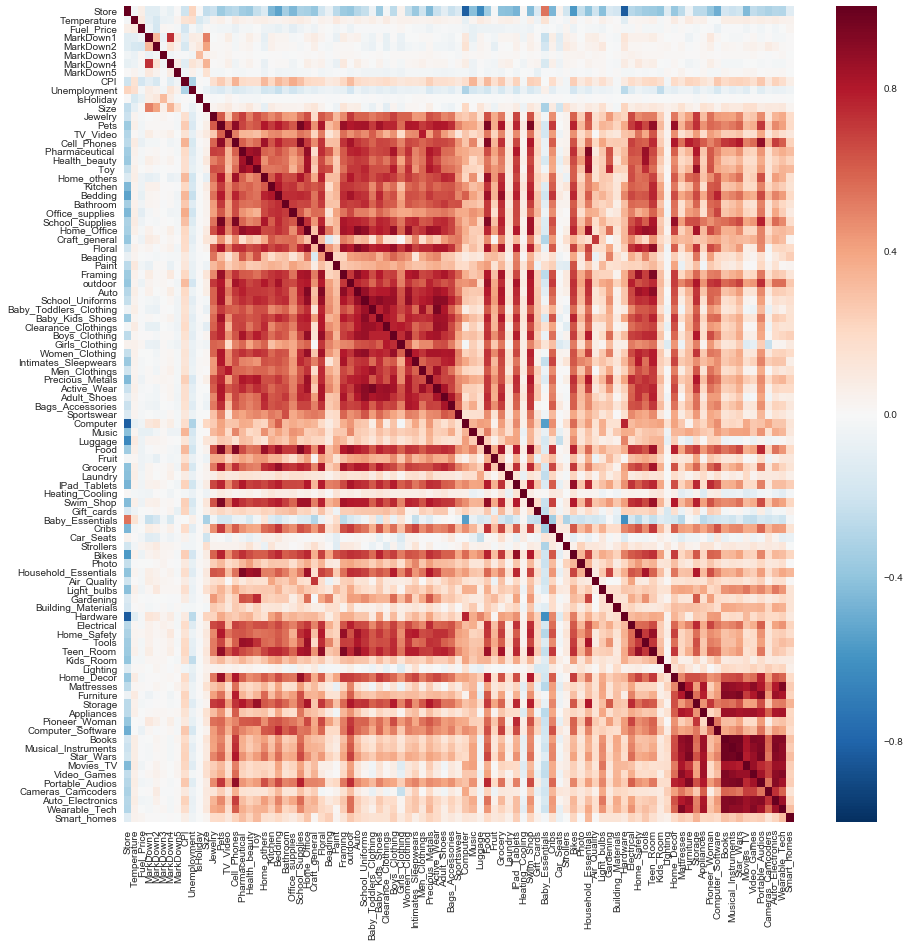

In [9]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,15)) 
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#sns.plt.show()

Markdowns vs IsHoliday
Create table with stores, markdowns and IsHoliday as columns 

In [10]:
df_master_MK = df_master.iloc[:,:14]
print (df_master_MK.head())

   Store                 Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-05-02 00:00:00        42.31       2.572    10382.9    6115.67   
1      1  2010-12-02 00:00:00        38.51       2.548    10382.9    6115.67   
2      1  2010-02-19 00:00:00        39.93       2.514    10382.9    6115.67   
3      1  2010-02-26 00:00:00        46.63       2.561    10382.9    6115.67   
4      1  2010-05-03 00:00:00        46.50       2.625    10382.9    6115.67   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment IsHoliday Type  \
0     215.07    2406.62    6551.42  211.096358         8.106     False    A   
1     215.07    2406.62    6551.42  211.242170         8.106      True    A   
2     215.07    2406.62    6551.42  211.289143         8.106     False    A   
3     215.07    2406.62    6551.42  211.319643         8.106     False    A   
4     215.07    2406.62    6551.42  211.350143         8.106     False    A   

     Size  
0  151315  
1  151315  
2  15131

Create correlation matrix for the master markdown table

In [11]:
#Correlation Matrix
import seaborn as sns

corrMK = df_master_MK.corr()
print (corrMK)


                     Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
Store         1.000000e+00    -0.020566    0.066682  -0.115891  -0.114429   
Temperature  -2.056605e-02     1.000000    0.101354  -0.100008  -0.167981   
Fuel_Price    6.668205e-02     0.101354    1.000000  -0.051961  -0.171924   
MarkDown1    -1.158910e-01    -0.100008   -0.051961   1.000000   0.327428   
MarkDown2    -1.144288e-01    -0.167981   -0.171924   0.327428   1.000000   
MarkDown3    -3.299465e-02    -0.063182    0.020473  -0.063912  -0.027558   
MarkDown4    -7.955204e-02    -0.061043    0.010373   0.729078   0.142922   
MarkDown5     3.049917e-04     0.037315   -0.015958   0.102978   0.046526   
CPI          -2.045446e-01     0.147588   -0.183152  -0.096292  -0.165156   
Unemployment  2.195538e-01     0.169233   -0.016409   0.079114   0.051529   
IsHoliday    -2.107519e-19    -0.161906   -0.078238   0.074061   0.114138   
Size         -2.442698e-01    -0.093345    0.015080   0.507336   0.399288   

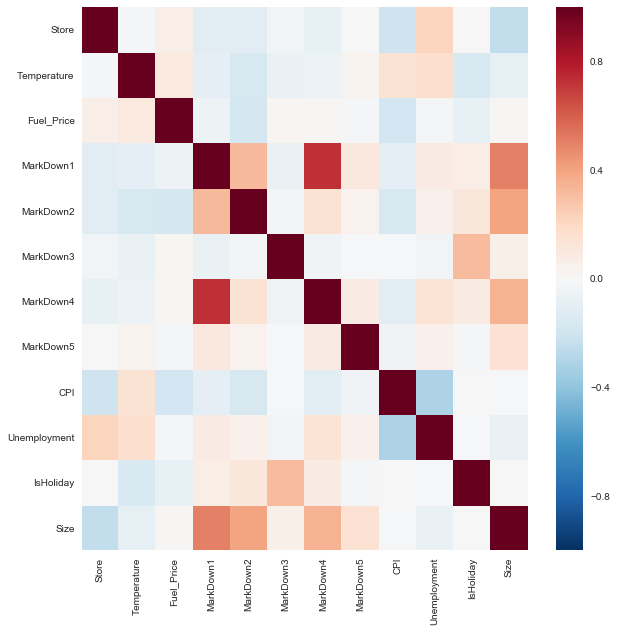

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrMK, 
            xticklabels=corrMK.columns.values,
            yticklabels=corrMK.columns.values)

### Correlation 

##### Positively Correlated Features:
* MarkDown1 vs Size: 0.507336
* Markdown1 vs Markdown4: 0.729078

##### Moderate Positively Correlated Features:
* MarkDown1 vs MarkDown2: 0.327428
* MarkDown2 vs Size: 0.399288
* MarkDown3 vs isHoliday: 0.318692
* MarkDown4 vs Size: 0.344459

##### Moderate Negatively Correlated Features:
* CPI vs Unemployment: -0.309903

#### Key Features to Investigate
1. The impact of store size on the success of promotional events
2. Relationship between promotional events

#### Stop and Think:
* What features affect our target variables the most (weekly sales during promotional events - MarkDown 1-5)?
* What features have strong correlations with each other?
* Can we do a more in depth examination of these features?

### Summary:

From the heatmap, there is a positive(+) correlation between size and most of the markdowns. Which could mean that the bigger the store, there is more likelihood of success in the promotional events. There is also positive correlation between the promotional events which could suggest that each promotional event have impact on the other. 

For the negative(-) relationships, CPI and Unemployment are highly correlated. This suggests that unemployment affects the rate at which people spend on products in the retail stores.

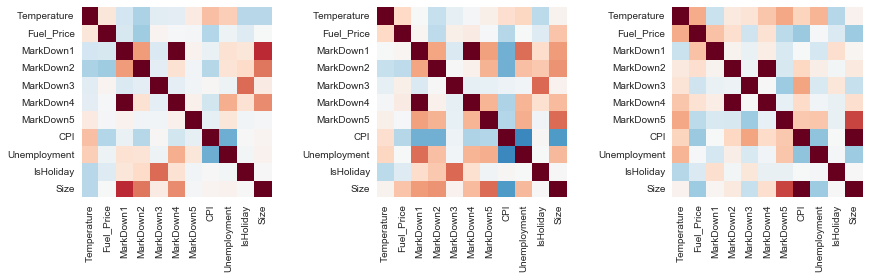

In [13]:
#correlation matrix
fig, axarr = plt.subplots(1,3, figsize=(15, 3.5))
sns.heatmap(df_master_MK.drop(['Store'], axis=1)[df_master_MK.Type == 'A'].corr(), vmax=.6, 
            square=True, ax=axarr[0], cbar=None);
sns.heatmap(df_master_MK.drop(['Store'], axis=1)[df_master_MK.Type == 'B'].corr(), vmax=.6, 
            square=True, ax=axarr[1], cbar=None);
sns.heatmap(df_master_MK.drop(['Store'], axis=1)[df_master_MK.Type == 'C'].corr(), vmax=.6, 
            square=True, ax=axarr[2], cbar=None);

We will consider how the correlated features differ with respect to store type.

 | Correlated Features   | General    | Store Type A    | Store Type B    | Store Type C|
 |:-------------------   | :---------:|:---------------:|:---------------:|------------:|
 | MarkDown1 vs Size     | 0.507336   | 0.4492586       | 0.2571993       | 0.01058361  |
 | Markdown1 vs Markdown4| 0.729078   | 0.7130630       | 0.6996620       | 0.04360900  |
 | Markdown1 vs Markdown2| 0.327428   | 0.2559690       | 0.2348070       | 0.02007900  |
 | MarkDown2 vs Size     | 0.399288   | 0.3212906       | 0.2674066       | 0.05652617  |
 | MarkDown3 vs isHoliday| 0.318692   | 0.3419540       | 0.3446290       | 0.07470604  |
 | MarkDown4 vs Size     | 0.344459   | 0.2850073       | 0.1888860       | 0.10055150  |
 | CPI vs Unemployment   | -0.309903  | -0.290913       | -0.384845       | -0.2392510  |

* Stores A and B follows similar relationship trend with expected while Store C deviates from the general store correlation
* The relationship between CPI & Unemployment is the same across the different store types

In [14]:
df_master_MK_corr_by_type = df_master_MK.groupby('Type').corr()
print(df_master_MK_corr_by_type)
    

                        CPI  Fuel_Price     IsHoliday  MarkDown1  MarkDown2  \
Type                                                                          
A    CPI           1.000000   -0.174835  3.956220e-03  -0.037873  -0.172916   
     Fuel_Price   -0.174835    1.000000 -7.734076e-02  -0.103064  -0.214297   
     IsHoliday     0.003956   -0.077341  1.000000e+00   0.073392   0.116350   
     MarkDown1    -0.037873   -0.103064  7.339248e-02   1.000000   0.255969   
     MarkDown2    -0.172916   -0.214297  1.163501e-01   0.255969   1.000000   
     MarkDown3     0.006678    0.014129  3.419545e-01  -0.092235  -0.061598   
     MarkDown4    -0.115345   -0.007925  9.050328e-02   0.713063   0.092789   
     MarkDown5    -0.051801   -0.012903 -2.173235e-02   0.026016  -0.022661   
     Size          0.014499   -0.002379  7.703705e-18   0.449259   0.321291   
     Store        -0.249990    0.085592  1.954843e-17  -0.088668  -0.114359   
     Temperature   0.181204    0.071836 -1.658532e-0